In [22]:
import pandas as pd
import os

Merge the 12 months of sales data into a single csv file

In [23]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('./Sales_Data')]  #list comprehension

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index = False)

In [24]:
#updated dataframe
all_data = pd.read_csv("all_data.csv")
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
5,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
6,176563,Bose SoundSport Headphones,1,99.99,04-02-19 7:46,"668 Center St, Seattle, WA 98101"
7,176564,USB-C Charging Cable,1,11.95,04-12-19 10:58,"790 Ridge St, Atlanta, GA 30301"
8,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
9,176566,Wired Headphones,1,11.99,04-08-19 14:05,"83 7th St, Boston, MA 02215"


DATA CLEANING

Drop rows of NAN

In [25]:
nan_df = all_data[all_data.isnull().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Find 'Or' and delete it

In [26]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']


Convert columns to the correct type

In [27]:
#pd.to_numeric function converts string type to most appropriate numeric type

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])#int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])#float

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Augment data with additional columns

In [28]:
#Adding month column

all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


Reorder columns for better readability

In [29]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
cols = list(all_data.columns.values)

all_data = all_data[cols[0:4] + [cols[7]] + cols[4:7]]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,600.00,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


Question 1 - What was the best month for sales? How much was earned that month?

In [30]:
temp = all_data.groupby('Month').sum()
temp.loc[temp['Sales'] == temp['Sales'].max()]

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address
Month,,,,,,,
12,2956652956662956672956682956692956702956712956...,Macbook Pro LaptopLG Washing MachineUSB-C Char...,28114,4588415.41,4613443.34,12/30/19 00:0112/29/19 07:0312/12/19 18:2112/2...,"136 Church St, New York City, NY 10001562 2nd ..."


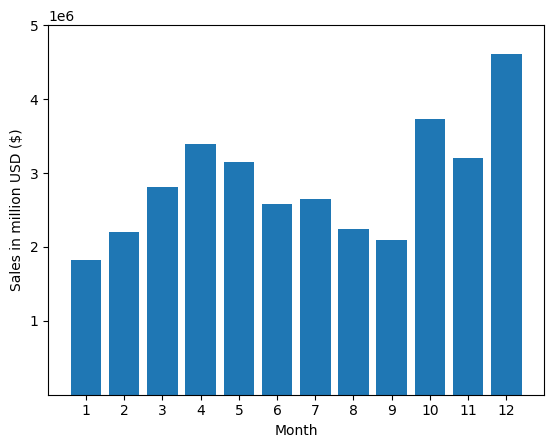

In [45]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months,temp['Sales'])
plt.xticks(months)
plt.yticks([1000000,2000000,3000000,4000000,5000000])
plt.ylabel('Sales in million USD ($)')
plt.xlabel('Month')

plt.show()

#answer - December

Question 2 - What city has the highest number of sales?

In [44]:
#add city column

all_data.head()
s = all_data['Purchase Address'].str.split(',\s*')
s1 = s.str[2].str.split()
all_data['City']=s.str[1]+' ('+s1.str[0]+')'
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
2,176560,Google Phone,1,600.00,600.00,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176562,USB-C Charging Cable,1,11.95,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,San Francisco (CA)
6,176563,Bose SoundSport Headphones,1,99.99,99.99,04-02-19 7:46,"668 Center St, Seattle, WA 98101",4,Seattle (WA)
7,176564,USB-C Charging Cable,1,11.95,11.95,04-12-19 10:58,"790 Ridge St, Atlanta, GA 30301",4,Atlanta (GA)
8,176565,Macbook Pro Laptop,1,1700.00,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,San Francisco (CA)
9,176566,Wired Headphones,1,11.99,11.99,04-08-19 14:05,"83 7th St, Boston, MA 02215",4,Boston (MA)


In [46]:
temp_city = all_data.groupby('City').sum()
temp_city.loc[temp_city['Sales'] == temp_city['Sales'].max()]
temp_city.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
City,,,,,,,,
Atlanta (GA),1765641765711765821765891766231766271766341766...,USB-C Charging CableLightning Charging CableBo...,16602,2779908.20,2795498.58,04-12-19 10:5804/19/19 14:2904/27/19 12:2004-0...,"790 Ridge St, Atlanta, GA 30301253 Johnson St,...",104794
Austin (TX),1765911766091766741766771766861767011767051767...,Apple Airpods HeadphonesApple Airpods Headphon...,11153,1809873.61,1819581.75,04/21/19 07:2104-11-19 16:5904/20/19 20:5304-0...,"600 Maple St, Austin, TX 73301267 11th St, Aus...",69829
Boston (MA),1765591765661765781765811765851765851766001766...,Bose SoundSport HeadphonesWired HeadphonesAppl...,22528,3637409.77,3661642.01,04-07-19 22:3004-08-19 14:0504-09-19 23:3504-0...,"682 Chestnut St, Boston, MA 0221583 7th St, Bo...",141112
Dallas (TX),1765581765691765701765771765961766021766101766...,USB-C Charging Cable27in 4K Gaming MonitorAA B...,16730,2752627.82,2767975.40,04/19/19 08:4604/16/19 19:2304/22/19 15:0904-0...,"917 1st St, Dallas, TX 75001657 Hill St, Dalla...",104620
Los Angeles (CA),1765601765601765611765671765741765741765761765...,Google PhoneWired HeadphonesWired HeadphonesGo...,33289,5421435.23,5452570.80,04-12-19 14:3804-12-19 14:3804/30/19 09:2704/1...,"669 Spruce St, Los Angeles, CA 90001669 Spruce...",208325


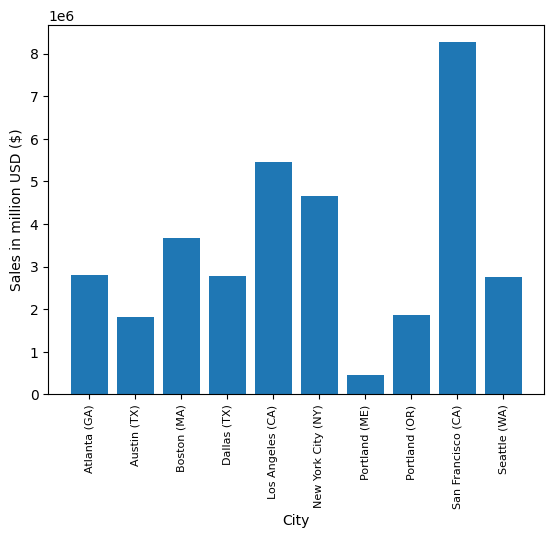

In [51]:
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities,temp_city['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in million USD ($)')
plt.xlabel('City')
plt.show()

#answer - San Francisco

Question 3 - What time should we display advertisements to maximize likelihood of customer's buying product?

In [59]:
#add Time column

t = all_data['Order Date'].str.split()
all_data['Time']=t.str[1]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Time
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),08:46
1,176559,Bose SoundSport Headphones,1,99.99,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),22:30
2,176560,Google Phone,1,600.00,600.00,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14:38
3,176560,Wired Headphones,1,11.99,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14:38
4,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),09:27


In [61]:
temp_time = all_data.groupby('Time').sum()
temp_time.loc[temp_time['Sales'] == temp_time['Sales'].max()]

#so max sales occured at 19:01 hrs

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
Time,,,,,,,,,
19:01,1779421803601811931812121832431836891842101855...,AA Batteries (4-pack)ThinkPad LaptopAAA Batter...,269,54358.35,54503.14,04/29/19 19:0104/25/19 19:0104/25/19 19:0104-0...,"639 Willow St, Los Angeles, CA 90001295 Dogwoo...",1777,Los Angeles (CA)Los Angeles (CA)Dallas (TX)San...


more useful - graphical representation

In [64]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [71]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Time,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),08:46,8,46
1,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),22:30,22,30
2,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14:38,14,38
3,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14:38,14,38
4,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),09:27,9,27


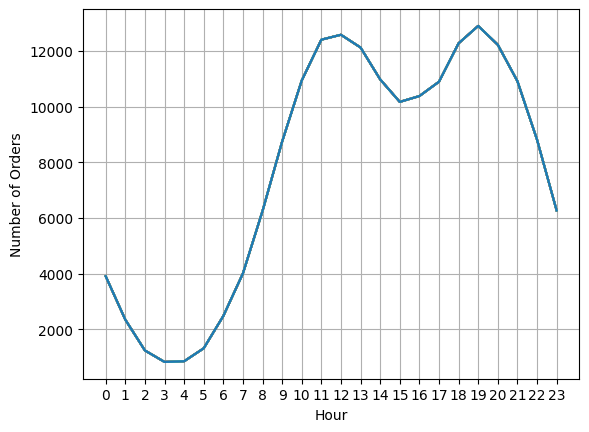

In [85]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

#answer - 11am and/or 7pm

Question 4 - What products are most often sold together?

In [93]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]  #filters rows with duplicate Order IDs

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

df = df[['Order ID','Grouped']].drop_duplicates()
df.head(10)

C:\Users\Siddharth\AppData\Local\Temp\ipykernel_19788\1216474357.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,Grouped
2,176560,"Google Phone, Wired Headphones"
17,176574,"Google Phone, USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
31,176586,"AAA Batteries (4-pack), Google Phone"
118,176672,"Lightning Charging Cable, USB-C Charging Cable"
128,176681,"Apple Airpods Headphones, ThinkPad Laptop"
137,176689,"Bose SoundSport Headphones, AAA Batteries (4-p..."
188,176739,"34in Ultrawide Monitor, Google Phone"
224,176774,"Lightning Charging Cable, USB-C Charging Cable"
232,176781,"iPhone, Lightning Charging Cable"


In [99]:
#https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80


Question 5 - What product was sold the most? Why do you think it was sold the most?

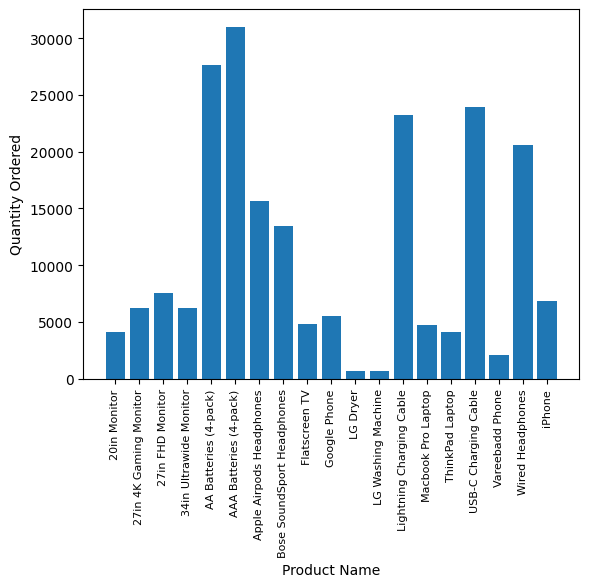

In [122]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum()

products = [product for product, df in product_group]

plt.bar(products,quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation='vertical', size = 8)
plt.show()

#answer - AAA Batteries (4-pack) sold the most. Cheaper products sell more.

C:\Users\Siddharth\AppData\Local\Temp\ipykernel_19788\3862875832.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation='vertical', size = 8)


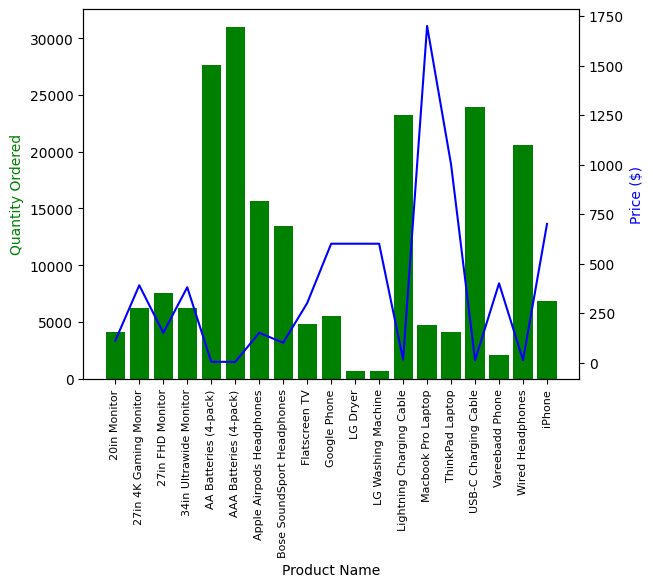

In [131]:
prices = all_data.groupby('Product')['Price Each'].mean()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered, color = 'g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax1.set_xticklabels(products, rotation='vertical', size = 8)
ax2.set_ylabel('Price ($)', color='b')

plt.show()